In [7]:
from sklearn.datasets import fetch_lfw_people
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60)
print faces.target_names
print faces.images.shape

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


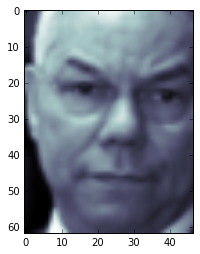

In [10]:
plt.imshow(faces.images[0], cmap='bone')

In [14]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [15]:
pca = PCA(svd_solver='randomized', n_components=150, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, random_state=42)

In [32]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}

grid = GridSearchCV(model, param_grid)

%time grid.fit(X_train, y_train)
print grid.best_params_

CPU times: user 2min 37s, sys: 1min 16s, total: 3min 54s
Wall time: 1min 16s
{'svc__gamma': 0.001, 'svc__C': 50}


In [35]:
print grid.get_params()

{'n_jobs': 1, 'estimator__svc__kernel': 'rbf', 'estimator__svc__max_iter': -1, 'estimator__svc__probability': False, 'estimator__svc__decision_function_shape': None, 'estimator__steps': [('pca', PCA(copy=True, iterated_power='auto', n_components=150, random_state=42,
  svd_solver='randomized', tol=0.0, whiten=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))], 'estimator__svc__shrinking': True, 'estimator__pca__copy': True, 'param_grid': {'svc__gamma': [0.0001, 0.0005, 0.001, 0.005], 'svc__C': [1, 5, 10, 50]}, 'cv': None, 'verbose': 0, 'scoring': None, 'estimator__svc__tol': 0.001, 'estimator__svc__class_weight': 'balanced', 'estimator__svc__random_state': None, 'estimator__svc__coef0': 0.0, 'estimator__svc': SVC(C=1.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_s

In [50]:
model = grid.best_estimator_
pred = model.predict(X_test)

In [38]:
model.score(X_test, y_test)

0.85459940652818989

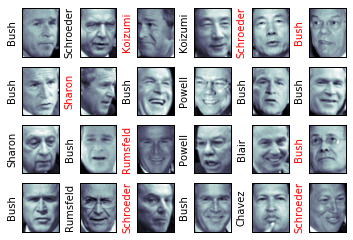

In [55]:
fig, ax = plt.subplots(4, 6)
for i, axi in enumerate(ax.ravel()):
    axi.imshow(X_test[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[pred[i]].split()[-1],
                   color = 'black' if pred[i] == y_test[i] else 'red')

In [56]:
from sklearn.metrics import classification_report


In [58]:
print classification_report(y_test, pred, target_names=faces.target_names)

                   precision    recall  f1-score   support

     Ariel Sharon       0.73      0.73      0.73        15
     Colin Powell       0.82      0.91      0.86        68
  Donald Rumsfeld       0.87      0.84      0.85        31
    George W Bush       0.86      0.89      0.88       126
Gerhard Schroeder       0.80      0.87      0.83        23
      Hugo Chavez       1.00      0.80      0.89        20
Junichiro Koizumi       0.78      0.58      0.67        12
       Tony Blair       0.94      0.81      0.87        42

      avg / total       0.86      0.85      0.85       337



/home/salman/anaconda2/lib/python2.7/site-packages/seaborn/matrix.py:143: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if xticklabels == []:
/home/salman/anaconda2/lib/python2.7/site-packages/seaborn/matrix.py:151: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if yticklabels == []:


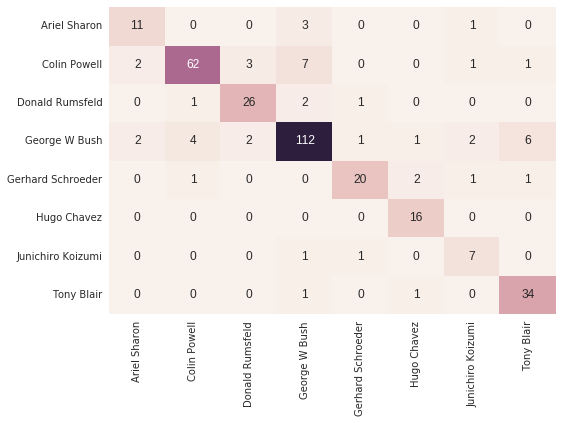

In [63]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, pred)
import seaborn as sns
sns.heatmap(mat.T, cbar=False, annot=True, fmt='d', xticklabels=faces.target_names, yticklabels=faces.target_names)

